In [81]:
#Import libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid') 

In [82]:
df = pd.read_csv("fr_2021.csv")

In [83]:
df.head(10)

,Unnamed: 0,PlayerName,Season,Position,Age,Team,OffensiveRating,DefensiveRating,RatingSum,scaledRatingSum
0,0,Nikola Jokić,2021,C,25,DEN,97,90,178,94
1,1,Giannis Antetokounmpo,2021,PF,26,MIL,92,91,174,91
2,2,Joel Embiid,2021,C,26,PHI,92,88,171,89
3,3,Jimmy Butler,2021,SF,31,MIA,89,89,170,89
4,4,Stephen Curry,2021,PG,32,GSW,94,83,170,89
5,5,Luka Dončić,2021,PG,21,DAL,92,85,170,89
6,6,Rudy Gobert,2021,C,28,UTA,84,97,170,89
7,7,LeBron James,2021,PG,36,LAL,89,86,168,88
8,8,Kawhi Leonard,2021,SF,29,LAC,89,86,168,88
9,9,James Harden,2021,PG-SG,31,BRK,90,84,168,88


In [84]:
# Dropping the first column that is not needed
df = df.drop("Unnamed: 0", axis=1)

In [85]:
df.head(10)

,PlayerName,Season,Position,Age,Team,OffensiveRating,DefensiveRating,RatingSum,scaledRatingSum
0,Nikola Jokić,2021,C,25,DEN,97,90,178,94
1,Giannis Antetokounmpo,2021,PF,26,MIL,92,91,174,91
2,Joel Embiid,2021,C,26,PHI,92,88,171,89
3,Jimmy Butler,2021,SF,31,MIA,89,89,170,89
4,Stephen Curry,2021,PG,32,GSW,94,83,170,89
5,Luka Dončić,2021,PG,21,DAL,92,85,170,89
6,Rudy Gobert,2021,C,28,UTA,84,97,170,89
7,LeBron James,2021,PG,36,LAL,89,86,168,88
8,Kawhi Leonard,2021,SF,29,LAC,89,86,168,88
9,James Harden,2021,PG-SG,31,BRK,90,84,168,88


In [86]:
# Looking for missing values, data types and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PlayerName       431 non-null    object
 1   Season           431 non-null    int64 
 2   Position         431 non-null    object
 3   Age              431 non-null    int64 
 4   Team             431 non-null    object
 5   OffensiveRating  431 non-null    int64 
 6   DefensiveRating  431 non-null    int64 
 7   RatingSum        431 non-null    int64 
 8   scaledRatingSum  431 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 30.4+ KB


In [87]:
# Review some statistics to get an idea of averages and look for any outliers. Example average age is 25.8
df.describe()

,Season,Age,OffensiveRating,DefensiveRating,RatingSum,scaledRatingSum
count,431.0,431.000000,431.000000,431.000000,431.000000,431.000000
mean,2021.0,25.770302,77.533643,78.665893,151.612529,77.951276
std,0.0,4.149043,4.653896,4.283524,6.407897,3.803908
min,2021.0,19.000000,68.000000,68.000000,136.000000,69.000000
25%,2021.0,22.000000,75.000000,76.000000,147.000000,75.000000
50%,2021.0,25.000000,77.000000,78.000000,151.000000,78.000000
75%,2021.0,28.500000,80.000000,81.000000,155.000000,80.000000
max,2021.0,37.000000,97.000000,97.000000,178.000000,94.000000


In [88]:
# Curious about how many players are over 35 and there are 5.
age = (df['Age'] > 35).value_counts()
print(age)

Age
False    426
True       5
Name: count, dtype: int64


In [89]:
df.shape

(431, 9)

In [90]:
df.columns

Index(['PlayerName', 'Season', 'Position', 'Age', 'Team', 'OffensiveRating',
       'DefensiveRating', 'RatingSum', 'scaledRatingSum'],
      dtype='object')

In [91]:
df.head()

,PlayerName,Season,Position,Age,Team,OffensiveRating,DefensiveRating,RatingSum,scaledRatingSum
0,Nikola Jokić,2021,C,25,DEN,97,90,178,94
1,Giannis Antetokounmpo,2021,PF,26,MIL,92,91,174,91
2,Joel Embiid,2021,C,26,PHI,92,88,171,89
3,Jimmy Butler,2021,SF,31,MIA,89,89,170,89
4,Stephen Curry,2021,PG,32,GSW,94,83,170,89


In [92]:
df.loc[df['Age'] == 37]

,PlayerName,Season,Position,Age,Team,OffensiveRating,DefensiveRating,RatingSum,scaledRatingSum
231,Andre Iguodala,2021,SF,37,MIA,74,84,151,78


In [93]:
df.loc[df['Age'] == 35]

,PlayerName,Season,Position,Age,Team,OffensiveRating,DefensiveRating,RatingSum,scaledRatingSum
14,Chris Paul,2021,PG,35,PHO,87,85,165,86
98,Paul Millsap,2021,PF,35,DEN,78,83,155,80
99,Dwight Howard,2021,C,35,PHI,77,84,155,80
126,Taj Gibson,2021,C,35,NYK,76,84,154,79
196,LaMarcus Aldridge,2021,C,35,BRK,78,78,152,78
222,Trevor Ariza,2021,SF,35,MIA,76,80,151,78
344,P.J. Tucker,2021,PF,35,MIL,71,79,146,75


In [94]:
df.Position.value_counts()

Position
SG       104
PF        88
PG        80
SF        73
C         71
SF-SG      3
SF-PF      3
C-PF       2
SG-PG      2
SG-SF      2
PF-SF      2
PG-SG      1
Name: count, dtype: int64

In [95]:
df.loc[df['Position'] == 'C']

,PlayerName,Season,Position,Age,Team,OffensiveRating,DefensiveRating,RatingSum,scaledRatingSum
0,Nikola Jokić,2021,C,25,DEN,97,90,178,94
2,Joel Embiid,2021,C,26,PHI,92,88,171,89
6,Rudy Gobert,2021,C,28,UTA,84,97,170,89
10,Nikola Vučević,2021,C,30,CHI,88,86,167,87
12,Bam Adebayo,2021,C,23,MIA,86,89,166,86
...,...,...,...,...,...,...,...,...,...
353,Harry Giles,2021,C,22,POR,74,76,146,75
357,Jahlil Okafor,2021,C,25,DET,75,74,146,75
367,Aron Baynes,2021,C,34,TOR,74,75,145,74
408,Daniel Oturu,2021,C,21,LAC,72,74,143,73


In [96]:
df.sort_values(['Position', 'Age', 'OffensiveRating'], ascending=True)


,PlayerName,Season,Position,Age,Team,OffensiveRating,DefensiveRating,RatingSum,scaledRatingSum
291,James Wiseman,2021,C,19,GSW,75,78,148,76
134,Isaiah Stewart,2021,C,19,DET,77,83,154,79
216,Onyeka Okongwu,2021,C,20,ATL,76,80,151,78
199,Jaxson Hayes,2021,C,20,NOP,78,78,152,78
408,Daniel Oturu,2021,C,21,LAC,72,74,143,73
...,...,...,...,...,...,...,...,...,...
390,J.J. Redick,2021,SG,36,DAL,75,71,144,73
336,R.J. Hampton,2021,SG-PG,19,ORL,75,75,147,75
61,Delon Wright,2021,SG-PG,28,SAC,80,85,158,82
184,Hamidou Diallo,2021,SG-SF,22,DET,77,80,152,78


In [97]:
df.sort_values(['Position', 'Age', 'DefensiveRating'], ascending=True)

,PlayerName,Season,Position,Age,Team,OffensiveRating,DefensiveRating,RatingSum,scaledRatingSum
291,James Wiseman,2021,C,19,GSW,75,78,148,76
134,Isaiah Stewart,2021,C,19,DET,77,83,154,79
199,Jaxson Hayes,2021,C,20,NOP,78,78,152,78
216,Onyeka Okongwu,2021,C,20,ATL,76,80,151,78
408,Daniel Oturu,2021,C,21,LAC,72,74,143,73
...,...,...,...,...,...,...,...,...,...
390,J.J. Redick,2021,SG,36,DAL,75,71,144,73
336,R.J. Hampton,2021,SG-PG,19,ORL,75,75,147,75
61,Delon Wright,2021,SG-PG,28,SAC,80,85,158,82
184,Hamidou Diallo,2021,SG-SF,22,DET,77,80,152,78


In [98]:
df.RatingSum.max()

178

In [99]:
# Checking if Rating Sum determines the MVP and in this case it does. Jokic won the MVP in 2021.
df.query('RatingSum == 178')

,PlayerName,Season,Position,Age,Team,OffensiveRating,DefensiveRating,RatingSum,scaledRatingSum
0,Nikola Jokić,2021,C,25,DEN,97,90,178,94


In [106]:
df_corrolation = df.drop(['PlayerName', 'Season', 'Position', 'Team'], axis=1)
print(df_corrolation)


     Age  OffensiveRating  DefensiveRating  RatingSum  scaledRatingSum
0     25               97               90        178               94
1     26               92               91        174               91
2     26               92               88        171               89
3     31               89               89        170               89
4     32               94               83        170               89
..   ...              ...              ...        ...              ...
426   26               72               70        141               72
427   20               71               73        141               72
428   21               71               69        139               70
429   20               68               71        137               69
430   21               69               68        136               69

[431 rows x 5 columns]


In [107]:
df_corrolation.corr()

,Age,OffensiveRating,DefensiveRating,RatingSum,scaledRatingSum
Age,1.000000,0.197620,0.203989,0.241478,0.242566
OffensiveRating,0.197620,1.000000,0.470463,0.916074,0.913025
DefensiveRating,0.203989,0.470463,1.000000,0.779493,0.777992
RatingSum,0.241478,0.916074,0.779493,1.000000,0.997194
scaledRatingSum,0.242566,0.913025,0.777992,0.997194,1.000000


<AxesSubplot:>

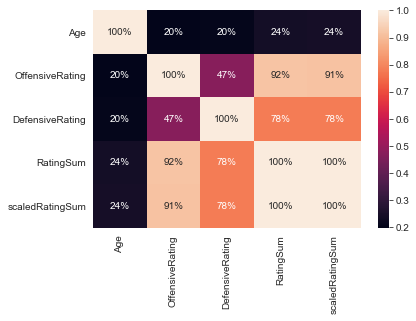

In [109]:
sns.heatmap(df_corrolation.corr(), annot=True, fmt='.0%')